# Projeto florestas aleatórias

Para este projeto, estaremos explorando dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus dados e ter em mente o contexto. Esses dados são de antes mesmo de serem públicos.

Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. Você pode baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas usar o csv já fornecido. Recomenda-se que você use o csv fornecido, uma vez que foi limpo dos valores de NA.

Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

# Importar bibliotecas

** Importe as bibliotecas usuais para pandas e plotagem. Você pode importar sklearn mais tarde. **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Obter dados

** Use pandas para ler loan_data.csv como um DataFrame chamado loans. **

In [3]:
loans = pd.read_csv('loan_data.csv')

** Use os métodos info(), head(), e describe() em loans. **

In [4]:
#Imprimir informações sobre o data frame
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# Imprimir as 10 primeiras linhas do DataFrame
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [6]:
# Imprimir estatísticas resumidas do DataFrame
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Análise exploratória de dados 

Vamos fazer alguma visualização de dados! Usaremos os recursos de plotagem incorporados ao seaborn e ao pandas, mas sinta-se livre para usar qualquer biblioteca que você deseja. Não se preocupe com as cores, apenas se preocupe em obter a idéia principal do plot.

** Crie um histograma de duas distribuições FICO umas sobre as outras, uma para cada um dos valores possíveis de credit.policy **.

* Nota: Isto é bastante complicado, sinta-se à vontade para fazer referência às soluções. Você provavelmente precisará de uma linha de código para cada histograma, eu também recomendo usar o .hist() incorporado ao pandas. *

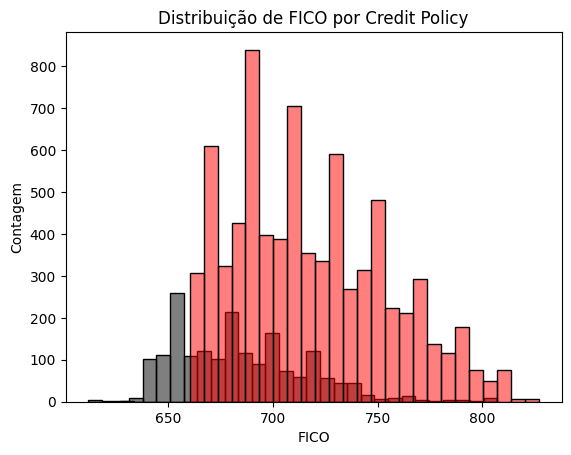

In [7]:
# Carregar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV em um DataFrame
loans = pd.read_csv('loan_data.csv')

# Criar histograma para credit.policy == 0
sns.histplot(data=loans[loans['credit.policy'] == 0], x='fico', color='black', alpha=0.5, bins=30)

# Criar histograma para credit.policy == 1
sns.histplot(data=loans[loans['credit.policy'] == 1], x='fico', color='red', alpha=0.5, bins=30)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de FICO por Credit Policy')
plt.xlabel('FICO')
plt.ylabel('Contagem')

# Exibir o plot
plt.show()


** Crie uma figura semelhante, mas dessa vez use a coluna not.fully.paid. **

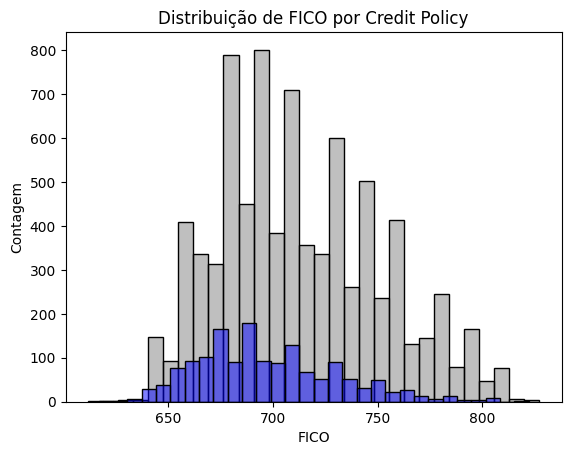

In [8]:
# Carregar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV em um DataFrame
loans = pd.read_csv('loan_data.csv')

# Criar histograma para credit.policy == 0
sns.histplot(data=loans[loans['not.fully.paid'] == 0], x='fico', color='gray', alpha=0.5, bins=30)

# Criar histograma para credit.policy == 1
sns.histplot(data=loans[loans['not.fully.paid'] == 1], x='fico', color='blue', alpha=0.5, bins=30)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição de FICO por Credit Policy')
plt.xlabel('FICO')
plt.ylabel('Contagem')

# Exibir o plot
plt.show()


** Crie um countplot usando seaborn mostrando a contagens de empréstimos por finalidade, com a matiz de cor definido por not.fully.paid. **

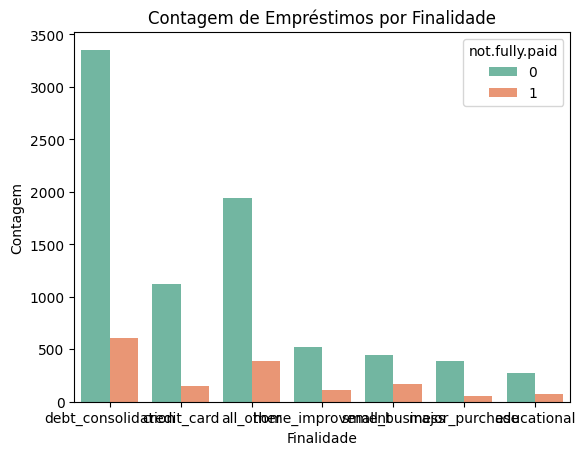

In [9]:
# Ler o arquivo CSV em um DataFrame
loans = pd.read_csv('loan_data.csv')

# Criar countplot de empréstimos por finalidade com matiz de cor definido por not.fully.paid
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set2')

# Adicionar título e rótulos dos eixos
plt.title('Contagem de Empréstimos por Finalidade')
plt.xlabel('Finalidade')
plt.ylabel('Contagem')

# Exibir o plot
plt.show()

** Veja a tendência entre o índice FICO e a taxa de juros. Recrie o seguinte jointplot. **

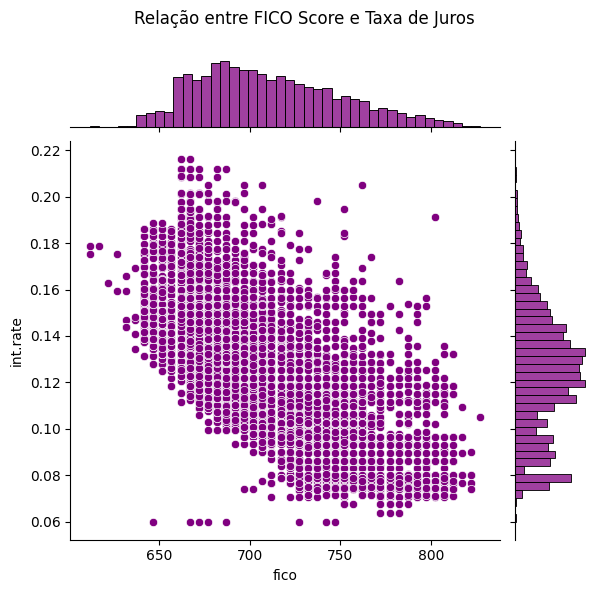

In [10]:
# Criar jointplot de FICO Score vs Taxa de Juros
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

# Adicionar título
plt.subplots_adjust(top=0.9)
plt.suptitle('Relação entre FICO Score e Taxa de Juros')

# Exibir o plot
plt.show()


** Crie os seguintes lmplots para ver se a tendência diferiu entre not.fully.paid e credit.policy. Verifique a documentação para lmplot() se você não consegue descobrir como separá-lo em colunas. **

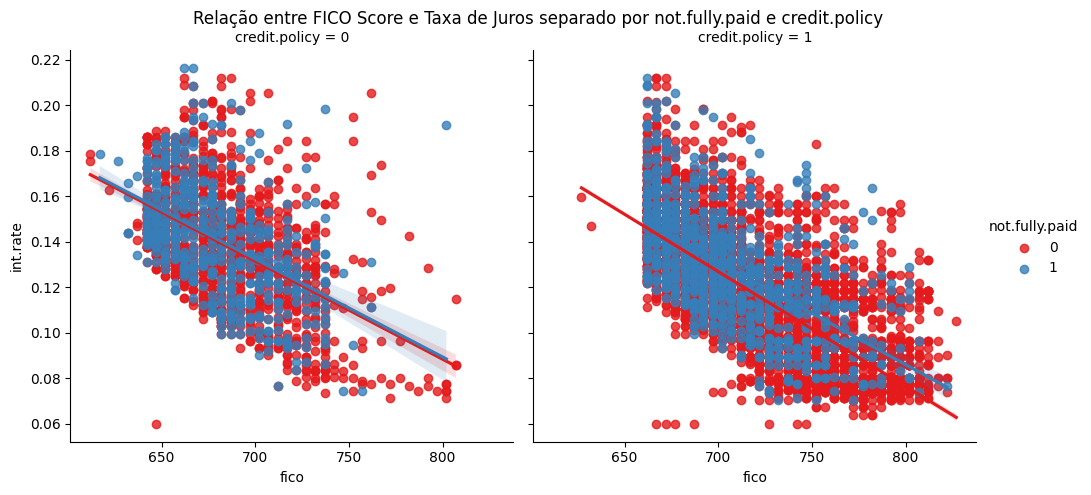

In [11]:
# Ler o arquivo CSV em um DataFrame
loans = pd.read_csv('loan_data.csv')

# Criar lmplot de FICO Score vs Taxa de Juros, separado por not.fully.paid
sns.lmplot(x='fico', y='int.rate', data=loans, hue='not.fully.paid', col='credit.policy', palette='Set1')

# Adicionar título
plt.subplots_adjust(top=0.9)
plt.suptitle('Relação entre FICO Score e Taxa de Juros separado por not.fully.paid e credit.policy')

# Exibir o plot
plt.show()

# Configurando os dados

Vamos nos preparar para configurar nossos dados para o nosso modelo de classificação de florestas aleatórias!

** Verifique loans.info() novamente. **

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Recursos categóricos

Observe a coluna ** purpose ** como categórica.

Isso significa que precisamos transformá-los usando variáveis dummys para que Sklearn possa compreendê-las. Vamos fazer isso em um passo limpo usando pd.get_dummies.

Vamos mostrar uma maneira de lidar com essas colunas que podem ser expandidas para múltiplos parâmetros categóricos, se necessário.

** Crie uma lista de 1 elemento contendo a string 'purpose'. Chame esta lista de cat_feats. **

In [14]:
cat_feats = ['purpose']

** Agora use "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um DataFrame maior fixo que tenha novas colunas de recursos com variáveis dummy. Chame este dataframe de final_data. **

In [15]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

## Divisão Treino-Teste de dados

Agora é hora de dividir nossos dados em um conjunto de treinamento e um conjunto de testes!

** Use sklearn para dividir seus dados em um conjunto de treinamento e um conjunto de testes como fizemos no passado. **

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model

Vamos começar treinando uma única árvore de decisão primeiro!

** Import DecisionTreeClassifier **

In [28]:
from sklearn.tree import DecisionTreeClassifier

** Crie uma instância de DecisionTreeClassifier() chamada dtree e fite-a com os dados de treinamento. **

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Criando uma instância do modelo de árvore de decisão
dtree = DecisionTreeClassifier()
#dtree.fit(X_train, y_train)

In [30]:
# Ajustando o modelo aos dados de treinamento
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Previsões e avaliação da árvore de decisão
** Faça previsões do conjunto de teste e crie um relatório de classificação e uma matriz de confusão. **

In [31]:
# Fazendo previsões no conjunto de teste
y_pred = dtree.predict(X_test)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874



In [34]:
# Imprimindo a matriz de confusão
print(confusion_matrix(y_test, y_pred))

[[2028  380]
 [ 370   96]]


## Treinando o modelo de florestas aleatórias

Agora é hora de treinar nosso modelo!

** Crie uma instância da classe RandomForestClassifier e ajuste-a aos nossos dados de treinamento da etapa anterior. **

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Criando uma instância do modelo com 100 árvores de decisão
rfc = RandomForestClassifier(n_estimators=100)

In [37]:
# Ajustando o modelo aos dados de treinamento
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Previsões e Avaliação

Vamos prever os valores do y_test e avaliar o nosso modelo.

** Preveja a classe de not.fully.paid para os dados X_test. **

In [38]:
y_pred = rfc.predict(X_test)

** Agora crie um relatório de classificação dos resultados. Você recebe algo estranho ou algum tipo de aviso? **

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.35      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



** Mostre a Matriz de Confusão para as previsões. **

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2395,   13],
       [ 459,    7]])

** O que performou melhor: a floresta aleatória ou a árvore de decisão? **

A floresta aleatória performou melhor do que a árvore de decisão.
A partir das métricas de avaliação, podemos ver que a acurácia da floresta aleatória é maior do que a árvore de decisão.
A floresta aleatória também apresentou valores melhores de precision, recall e F1-score.
Além disso, a matriz de confusão da floresta aleatória mostra um número menor de falsos positivos e falsos negativos, o que indica que é uma abordagem mais robusta e confiável.